# 의사결정나무 

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.decomposition import PCA
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import statsmodels.api as sm
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [162]:
ls

 Untitled.ipynb
 tree_final.dot
'분류예측 트리, 랜덤포레스트_민기.ipynb'
'의사결정나무_랜덤포레스트_그래디언트 부스팅_1 or 2.ipynb'
'의사결정나무_랜덤포레스트_그래디언트 부스팅_1 or 2_수정.ipynb'
'의사결정나무_랜덤포레스트_그래디언트 부스팅_4 or 5.ipynb'
'의사결정나무_랜덤포레스트_그래디언트 부스팅_군집 분석 후.ipynb'
 이걸로군집예측모델링하자연정쓰.csv
'인공신경망, 그래디언트 부스팅_0 or 1.ipynb'
'인공신경망, 그래디언트 부스팅_0 or 1_변수 추가.ipynb'


In [163]:
# '재구매여부' 0 삭제
df_final = pd.read_csv('이걸로군집예측모델링하자연정쓰.csv')

In [164]:
df_final

,Unnamed: 0,Unnamed: 0.1,ID,결혼유무,연령,결제등록카드,유입경로,자녀여부,구매시월령(수정),구매금액,...,물품대분류,브랜드,중분류,할인율,누적결제금액,제품구매수,주문번호,ClusterKmeans,재구매횟수(재구매강도),Target_cluster
0,0,0,201901060753970,기혼,34,신한은행,인스타그램,No,32,14000,...,기타,Go-MINI,장난감,0.010000,54083,3,201901291956704,4,0,0.0
1,1,1,201901060753970,기혼,34,신한은행,인스타그램,No,32,39000,...,기타,캐스돈,장난감,0.010000,54083,3,201902142029766,4,0,0.0
2,2,2,201901060753970,기혼,34,신한은행,인스타그램,No,32,53920,...,팬티,하기스,팬티형기저귀,0.318082,54083,3,201911203080517,4,0,0.0
3,3,3,201901110757720,기혼,34,농협회원조합,네이버블로그,Yes,23,14000,...,기타,Go-MINI,장난감,0.010000,3800,3,201911203080500,1,0,0.0
4,4,4,201901110757720,기혼,34,농협회원조합,네이버블로그,Yes,23,11900,...,SKC,그린핑거,화장품,0.109076,3800,3,201907082570562,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195228,195228,195228,201909230988339,기혼,33,신한은행,지인추천,Yes,13,66800,...,팬티,하기스,팬티형기저귀,0.334611,297823,6,202001153301078,1,0,0.0
195229,195229,195229,201909230988339,기혼,33,신한은행,지인추천,Yes,11,66800,...,팬티,하기스,팬티형기저귀,0.376811,297823,6,201910242998136,1,0,0.0
195230,195230,195230,201909230988339,기혼,33,신한은행,지인추천,Yes,10,66800,...,팬티,하기스,팬티형기저귀,0.298024,297823,6,201909072814592,1,0,0.0
195231,195231,195231,201909230988339,기혼,33,신한은행,지인추천,Yes,13,66800,...,팬티,하기스,팬티형기저귀,0.312350,297823,6,201910212966297,1,0,0.0


In [165]:
df_final.drop(['Unnamed: 0', 'ID', '결혼유무', '결제등록카드', '구매금액', '물품대분류', '브랜드', '누적결제금액', '제품구매수', '주문번호'], axis=1, inplace=True)
df_final.rename(columns={'재구매횟수(재구매강도)': '재구매횟수'}, inplace=True)

In [166]:
df_final.columns

Index(['Unnamed: 0.1', '연령', '유입경로', '자녀여부', '구매시월령(수정)', '결제금액', '중분류', '할인율',
       'ClusterKmeans', '재구매횟수', 'Target_cluster'],
      dtype='object')

In [167]:
df_final = df_final.iloc[:,1:11]

In [168]:
df_final.drop(['ClusterKmeans'], axis=1, inplace=True)

In [169]:
df2 = df_final[df_final['재구매횟수'] != 0]
df2

,연령,유입경로,자녀여부,구매시월령(수정),결제금액,중분류,할인율,재구매횟수,Target_cluster
6,34,네이버블로그,Yes,58,59776,팬티형기저귀,0.158559,15,0.0
7,34,네이버블로그,Yes,59,15147,팬티형기저귀,0.158500,15,0.0
8,34,네이버블로그,Yes,58,15147,팬티형기저귀,0.158500,15,0.0
9,34,네이버블로그,Yes,53,45726,팬티형기저귀,0.267212,15,0.0
10,28,인스타그램,Yes,58,14759,팬티형기저귀,0.168975,15,0.0
...,...,...,...,...,...,...,...,...,...
195113,34,인스타그램,Yes,12,47414,팬티형기저귀,0.436219,1,0.0
195181,32,검색광고,Yes,5,47001,밴드형기저귀,0.279126,1,0.0
195182,32,검색광고,Yes,7,45896,밴드형기저귀,0.203194,1,0.0
195203,33,검색광고,No,13,89956,팬티형기저귀,0.326677,1,0.0


In [170]:
df2 = df2[df2['연령']!='연령무']
df2

,연령,유입경로,자녀여부,구매시월령(수정),결제금액,중분류,할인율,재구매횟수,Target_cluster
6,34,네이버블로그,Yes,58,59776,팬티형기저귀,0.158559,15,0.0
7,34,네이버블로그,Yes,59,15147,팬티형기저귀,0.158500,15,0.0
8,34,네이버블로그,Yes,58,15147,팬티형기저귀,0.158500,15,0.0
9,34,네이버블로그,Yes,53,45726,팬티형기저귀,0.267212,15,0.0
10,28,인스타그램,Yes,58,14759,팬티형기저귀,0.168975,15,0.0
...,...,...,...,...,...,...,...,...,...
195113,34,인스타그램,Yes,12,47414,팬티형기저귀,0.436219,1,0.0
195181,32,검색광고,Yes,5,47001,밴드형기저귀,0.279126,1,0.0
195182,32,검색광고,Yes,7,45896,밴드형기저귀,0.203194,1,0.0
195203,33,검색광고,No,13,89956,팬티형기저귀,0.326677,1,0.0


In [171]:
from sklearn.preprocessing import LabelEncoder

In [172]:
encoding_columns = ['유입경로','자녀여부','중분류']
not_encoding_columns =['연령','구매시월령(수정)','결제금액','할인율','재구매횟수','Target_cluster']

In [173]:
enc_classes={}
def encoding_label(x):
    le=LabelEncoder()
    le.fit(x)
    label=le.transform(x)
    
    enc_classes[x.name]= le.classes_

    return label

In [174]:
d1= df2[encoding_columns].apply(encoding_label)
d2 = df2[not_encoding_columns]
data=d1.join(d2)
data.head()

,유입경로,자녀여부,중분류,연령,구매시월령(수정),결제금액,할인율,재구매횟수,Target_cluster
6,1,1,27,34,58,59776,0.158559,15,0.0
7,1,1,27,34,59,15147,0.158500,15,0.0
8,1,1,27,34,58,15147,0.158500,15,0.0
9,1,1,27,34,53,45726,0.267212,15,0.0
10,6,1,27,28,58,14759,0.168975,15,0.0


In [175]:
df_raw_x2 = data.drop('Target_cluster',axis=1)
df_raw_y2 = data['Target_cluster']

In [176]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x2,df_raw_y2,test_size=0.4,random_state=1234)

In [177]:
v_feature_name=df_train_x.columns

scaler=StandardScaler()

df_scaled=scaler.fit_transform(df_raw_x2)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()

,유입경로,자녀여부,중분류,연령,구매시월령(수정),결제금액,할인율,재구매횟수
0,-1.032022,0.492868,0.913913,0.407608,3.299212,1.892134,-0.550774,1.140436
1,-1.032022,0.492868,0.913913,0.407608,3.368491,-0.263847,-0.551177,1.140436
2,-1.032022,0.492868,0.913913,0.407608,3.299212,-0.263847,-0.551177,1.140436
3,-1.032022,0.492868,0.913913,0.407608,2.952817,1.213393,0.196179,1.140436
4,0.801803,0.492868,0.913913,-1.625895,3.299212,-0.282591,-0.479163,1.140436


In [178]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_scaled, df_raw_y2,random_state=1234, test_size=0.4, shuffle = True)

print('train data X size:', df_train_x.shape)
print('train data Y size:', df_train_y.shape)
print('test data X size:', df_test_x.shape)
print('test data Y size:', df_test_y.shape)

train data X size: (83091, 8)
train data Y size: (83091,)
test data X size: (55395, 8)
test data Y size: (55395,)


# 의사결정나무

In [26]:
tree_uncustomized=DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set : 0.999
Score on test set : 0.958


In [27]:
train_score=[];test_score=[];
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(random_state=1234,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
df_score_depth=pd.DataFrame()
df_score_depth["depth"]=para_depth
df_score_depth["Trainscore"]=train_score
df_score_depth["TestScore"]=test_score
df_score_depth.round(3)

,depth,Trainscore,TestScore
0,1,0.981,0.981
1,2,0.981,0.981
2,3,0.981,0.981
3,4,0.981,0.981
4,5,0.981,0.981
5,6,0.981,0.980
6,7,0.981,0.980
7,8,0.981,0.980
8,9,0.981,0.980
9,10,0.982,0.979


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


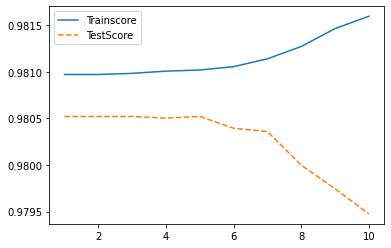

In [28]:
df_score_depth.round(3)
plt.plot(para_depth, train_score, linestyle='-',label="Trainscore")
plt.plot(para_depth, test_score, linestyle='--',label="TestScore")
plt.legend()

In [29]:
train_score=[];test_score=[];
para_split=[n_split *10 for n_split in range(1,11)]

for v_min_saples_split in para_split:
    tree=DecisionTreeClassifier(random_state=1234,max_depth=5, min_samples_split=v_min_saples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
df_score_split=pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["Trainscore"]=train_score
df_score_split["TestScore"]=test_score
df_score_split.round(3)

,MinSamplesSplit,Trainscore,TestScore
0,10,0.981,0.981
1,20,0.981,0.981
2,30,0.981,0.981
3,40,0.981,0.981
4,50,0.981,0.981
5,60,0.981,0.981
6,70,0.981,0.981
7,80,0.981,0.981
8,90,0.981,0.981
9,100,0.981,0.981


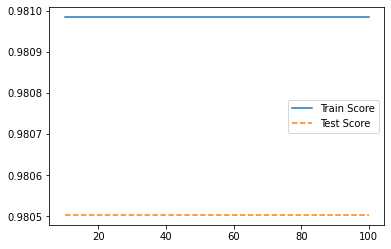

In [30]:
plt.plot(para_split,train_score,linestyle='-',label="Train Score")
plt.plot(para_split,test_score,linestyle='--',label="Test Score")
plt.legend()

In [39]:
train_score=[]; test_score=[];
para_leaf=[n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(random_state=1234,min_samples_leaf=v_min_samples_leaf,max_depth=5, min_samples_split=10)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["Testscore"]=test_score

df_score_leaf.round(5)


,MinSamplesLeaf,TrainScore,Testscore
0,1,0.98098,0.98050
1,2,0.98097,0.98052
2,3,0.98097,0.98052
3,4,0.98097,0.98052
4,5,0.98097,0.98052
5,6,0.98097,0.98052
6,7,0.98097,0.98052
7,8,0.98097,0.98052
8,9,0.98097,0.98052
9,10,0.98097,0.98052


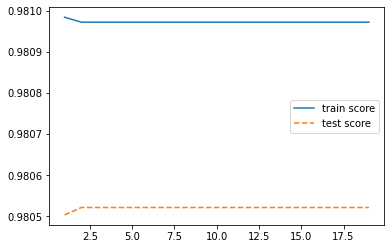

In [38]:
plt.plot(para_leaf,train_score,linestyle='-',label='train score')
plt.plot(para_leaf,test_score,linestyle='--',label='test score')
plt.legend()

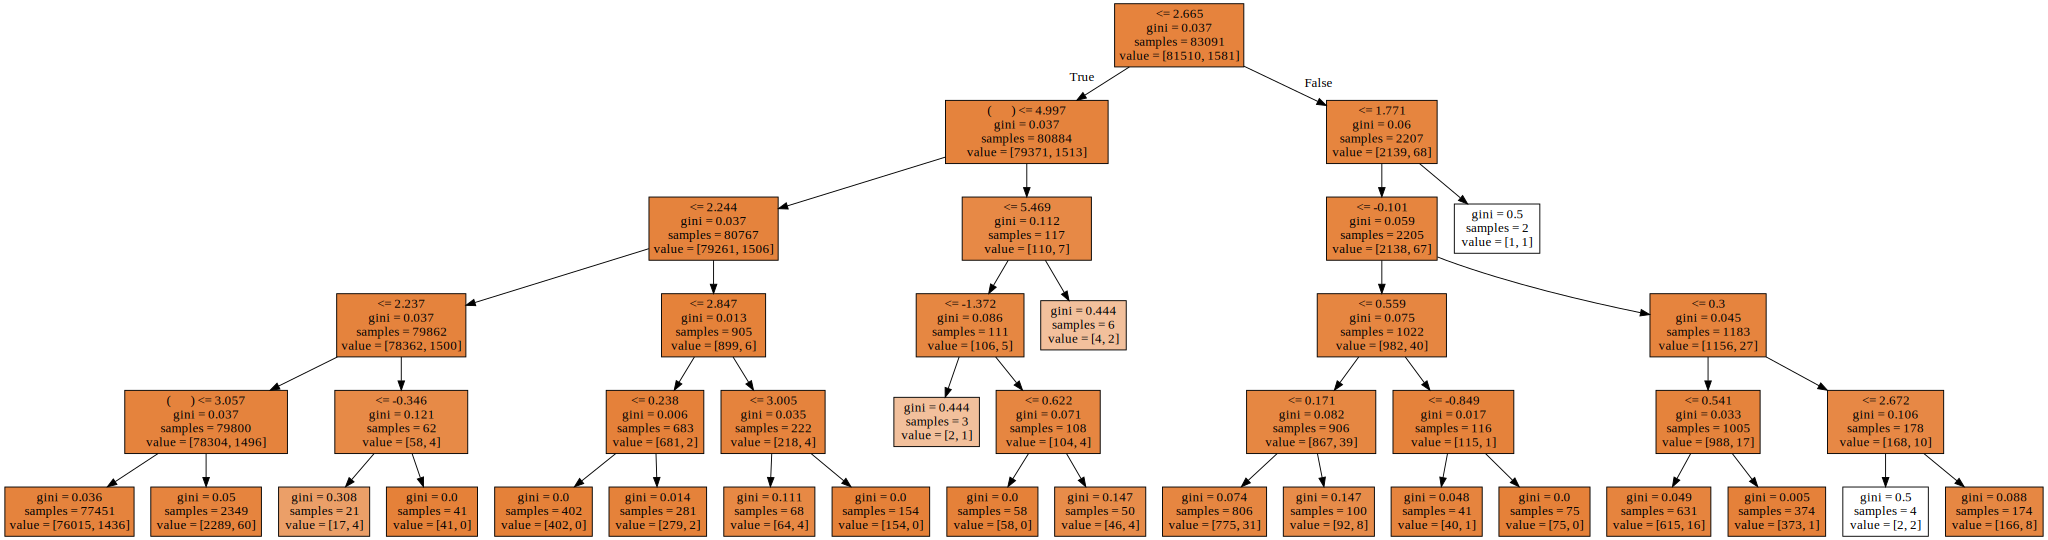

In [40]:
tree_final = DecisionTreeClassifier(min_samples_leaf=2,min_samples_split=10,max_depth=5,random_state=1234)
tree_final.fit(df_train_x,df_train_y)

export_graphviz(tree_final,out_file="tree_final.dot",feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [42]:
rf_final=DecisionTreeClassifier(min_samples_leaf=2,min_samples_split=10,max_depth=5,random_state=1234)

rf_final.fit(df_train_x,df_train_y)

y_pred=rf_final.predict(df_test_x)

print("Traning set 정확도 : {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("TEST set 정확도 : {:.3f}".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Traning set 정확도 : 0.981
TEST set 정확도 : 0.981
Confusion matrix:
[[54316     0]
 [ 1079     0]]


In [43]:
from sklearn.metrics import classification_report
report = classification_report(df_test_y, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     54316
         1.0       0.00      0.00      0.00      1079

    accuracy                           0.98     55395
   macro avg       0.49      0.50      0.50     55395
weighted avg       0.96      0.98      0.97     55395



In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [45]:
model_pipe = Pipeline( [('scaler',MinMaxScaler()), ('model',DecisionTreeClassifier())] )

In [46]:
param_list = {'model__criterion':['gini','entropy'],
             'model__class_weight':[None,'balanced'],
             'model__max_depth':[2,3,4,5,6],
             'model__min_samples_split':[2,3,4,5,6],
             'model__min_samples_leaf':[2,3,4,5,6]}

In [57]:
grid_model= GridSearchCV(model_pipe, param_grid=param_list, cv=5, scoring='precision', n_jobs=-1)
grid_model.fit(df_train_x, df_train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [2, 3, 4, 5, 6],
                         'model__min_samples_leaf': [2, 3, 4, 5, 6],
                         'model__min_samples_split': [2, 3, 4, 5, 6]},
             scoring='precision')

In [58]:
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=2))])

In [59]:
df_train_y_pred = best_model.predict(df_train_x)
df_test_y_pred = best_model.predict(df_test_x)

In [60]:
print(classification_report(df_train_y, df_train_y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     81510
         1.0       0.80      0.01      0.01      1581

    accuracy                           0.98     83091
   macro avg       0.89      0.50      0.50     83091
weighted avg       0.98      0.98      0.97     83091



In [61]:
print(classification_report(df_test_y, df_test_y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     54316
         1.0       0.14      0.00      0.00      1079

    accuracy                           0.98     55395
   macro avg       0.56      0.50      0.50     55395
weighted avg       0.96      0.98      0.97     55395



In [ ]:
aaadf_train_x.head(2)

In [62]:
df_train_y.value_counts()

0.0    81510
1.0     1581
Name: Target_cluster, dtype: int64

Text(0, 0.5, '설명변수')

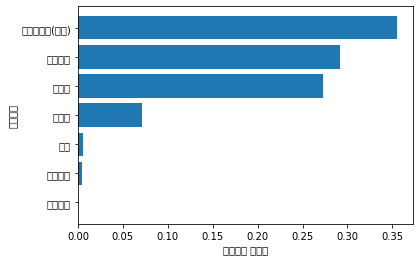

In [281]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [287]:
df_importance

,Feature,Importance
1,자녀여부,0.000000
0,유입경로,0.004115
3,연령,0.005643
2,중분류,0.071007
6,할인율,0.272776
5,결제금액,0.291553
4,구매시월령(수정),0.354906


#  Undersampling 

In [179]:
data['Target_cluster'].value_counts()

0.0    135826
1.0      2660
Name: Target_cluster, dtype: int64

In [180]:
cond1 = (data['Target_cluster']==0)
data1 = data.loc[ cond1].iloc[0:10000]
data2 = data.loc[~cond1]

data3 = pd.concat([data1, data2])

In [181]:
Y = data3['Target_cluster']
X = data3.drop(columns='Target_cluster')

In [182]:
df_train_x, df_test_x, df_train_y, df_test_y =train_test_split(X,Y, test_size=0.4,
                                                  random_state=1234)

In [183]:
model_pipe = Pipeline( [('scaler',MinMaxScaler()), ('model',DecisionTreeClassifier())] )

In [184]:
param_list = {'model__criterion':['gini','entropy'],
             'model__class_weight':[None,'balanced'],
             'model__max_depth':[2,3,4,5,6],
             'model__min_samples_split':[2,3,4,5,6],
             'model__min_samples_leaf':[2,3,4,5,6]}

In [185]:
grid_model= GridSearchCV(model_pipe, param_grid=param_list, cv=5, scoring='f1', n_jobs=-1)
grid_model.fit(df_train_x, df_train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [2, 3, 4, 5, 6],
                         'model__min_samples_leaf': [2, 3, 4, 5, 6],
                         'model__min_samples_split': [2, 3, 4, 5, 6]},
             scoring='f1')

In [186]:
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=6,
                                        min_samples_split=3))])

In [116]:
df_train_y_pred = best_model.predict(df_train_x)
df_test_y_pred = best_model.predict(df_test_x)

In [117]:
print(classification_report(df_train_y, df_train_y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84      6009
         1.0       0.48      0.88      0.62      1587

    accuracy                           0.78      7596
   macro avg       0.72      0.81      0.73      7596
weighted avg       0.86      0.78      0.80      7596



In [118]:
print(classification_report(df_test_y, df_test_y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.76      0.84      3991
         1.0       0.48      0.85      0.62      1073

    accuracy                           0.78      5064
   macro avg       0.72      0.80      0.73      5064
weighted avg       0.85      0.78      0.79      5064



In [187]:
gb_final=DecisionTreeClassifier(min_samples_leaf=6,min_samples_split=3,max_depth=5,random_state=1234)

gb_final.fit(df_train_x,df_train_y)

y_pred=gb_final.predict(df_test_x)

print("Traning set 정확도 : {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("TEST set 정확도 : {:.3f}".format(gb_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Traning set 정확도 : 0.852
TEST set 정확도 : 0.844
Confusion matrix:
[[3635  356]
 [ 436  637]]


In [188]:
from sklearn.metrics import classification_report
report = classification_report(df_test_y, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      3991
         1.0       0.64      0.59      0.62      1073

    accuracy                           0.84      5064
   macro avg       0.77      0.75      0.76      5064
weighted avg       0.84      0.84      0.84      5064



# 랜덤포레스트

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
model_pipe = Pipeline( [('scaler',MinMaxScaler()), ('model',RandomForestClassifier())] )

In [152]:
param_list = {'model__criterion':['gini','entropy'],
             'model__class_weight':[None,'balanced'],
             'model__n_estimators' : [40,50,60,70,80,90,100],
             'model__max_depth':[2,3,4,5,6],
             'model__min_samples_split':[10,20,30,40],
             'model__min_samples_leaf':[10,20,30,40]}

In [ ]:
df_train_x, df_test_x, df_train_y, df_test_y =train_test_split(X,Y, test_size=0.4,
                                                  random_state=1234)

In [119]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print("정확도 Training Set : {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("정확도 Test Set : {:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

정확도 Training Set : 1.000
정확도 Test Set : 0.853


In [120]:
train_accuracy=[];test_accuracy=[];
para_n_tree= [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
rf_accuracy_n= pd.DataFrame()
rf_accuracy_n["n_estimators"]=para_n_tree
rf_accuracy_n["Train Accuracy"]=train_accuracy
rf_accuracy_n["Test Accuracy"]=test_accuracy

In [121]:
rf_accuracy_n.round(3)

,n_estimators,Train Accuracy,Test Accuracy
0,10,0.989,0.841
1,20,0.997,0.848
2,30,0.998,0.856
3,40,0.999,0.856
4,50,0.999,0.853
5,60,0.999,0.852
6,70,1.000,0.853
7,80,1.000,0.854
8,90,1.000,0.853
9,100,1.000,0.853


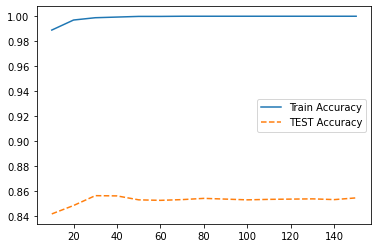

In [122]:
plt.plot(para_n_tree,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [123]:
train_accuracy=[];test_accuracy=[];
para_depth= [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth,n_estimators=80, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
rf_accuracy_depth= pd.DataFrame()
rf_accuracy_depth["Depth"]=para_depth
rf_accuracy_depth["Train Accuracy"]=train_accuracy
rf_accuracy_depth["Test Accuracy"]=test_accuracy

In [124]:
rf_accuracy_depth.round(3)

,Depth,Train Accuracy,Test Accuracy
0,1,0.791,0.788
1,2,0.791,0.788
2,3,0.818,0.811
3,4,0.826,0.818
4,5,0.847,0.837
5,6,0.862,0.838
6,7,0.871,0.840
7,8,0.883,0.846
8,9,0.895,0.845
9,10,0.906,0.846


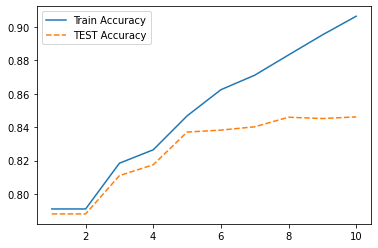

In [125]:
plt.plot(para_depth,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [126]:
train_accuracy=[];test_accuracy=[];
para_split= [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split=v_min_samples_split,max_depth = 5,n_estimators=80, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
rf_accuracy_split= pd.DataFrame()
rf_accuracy_split["Min_samples_split"]=para_split
rf_accuracy_split["Train Accuracy"]=train_accuracy
rf_accuracy_split["Test Accuracy"]=test_accuracy
rf_accuracy_split.round(3)

,Min_samples_split,Train Accuracy,Test Accuracy
0,10,0.846,0.837
1,20,0.849,0.837
2,30,0.847,0.836
3,40,0.844,0.835
4,50,0.845,0.835
5,60,0.841,0.831
6,70,0.841,0.831
7,80,0.841,0.830
8,90,0.839,0.829
9,100,0.840,0.831


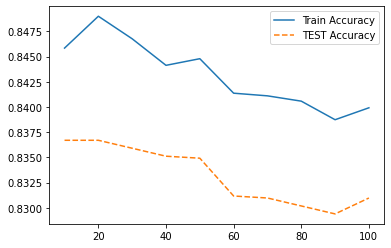

In [127]:
plt.plot(para_split,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [128]:
train_accuracy=[];test_accuracy=[];
para_leaf= [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf=v_min_samples_leaf,min_samples_split=40,max_depth = 5,n_estimators=80, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
rf_accuracy_leaf= pd.DataFrame()
rf_accuracy_leaf["Min_samples_leaf"]=para_leaf
rf_accuracy_leaf["Train Accuracy"]=train_accuracy
rf_accuracy_leaf["Test Accuracy"]=test_accuracy

In [129]:
rf_accuracy_leaf.round(3)

,Min_samples_leaf,Train Accuracy,Test Accuracy
0,10,0.844,0.833
1,20,0.845,0.836
2,30,0.843,0.834
3,40,0.839,0.829
4,50,0.839,0.829
5,60,0.834,0.824
6,70,0.832,0.825
7,80,0.831,0.824
8,90,0.834,0.823
9,100,0.834,0.824


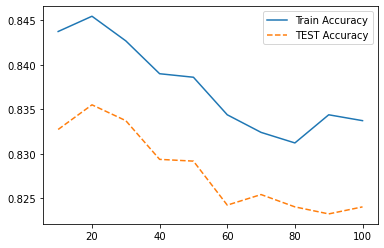

In [130]:
plt.plot(para_leaf,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [143]:
rf_final=RandomForestClassifier(min_samples_leaf=10,min_samples_split=20,max_depth=5,n_estimators=80,random_state=1234)

rf_final.fit(df_train_x,df_train_y)

y_pred=rf_final.predict(df_test_x)

print("Traning set 정확도 : {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("TEST set 정확도 : {:.3f}".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Traning set 정확도 : 0.847
TEST set 정확도 : 0.837
Confusion matrix:
[[3831  160]
 [ 664  409]]


In [144]:
from sklearn.metrics import classification_report
report = classification_report(df_test_y, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      3991
         1.0       0.72      0.38      0.50      1073

    accuracy                           0.84      5064
   macro avg       0.79      0.67      0.70      5064
weighted avg       0.82      0.84      0.82      5064



Text(0, 0.5, '설명변수')

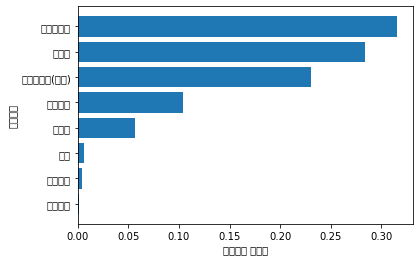

In [133]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [134]:
df_importance

,Feature,Importance
1,자녀여부,0.000759
0,유입경로,0.003990
3,연령,0.005785
6,할인율,0.056387
5,결제금액,0.103678
4,구매시월령(수정),0.230078
2,중분류,0.283877
7,재구매횟수,0.315447


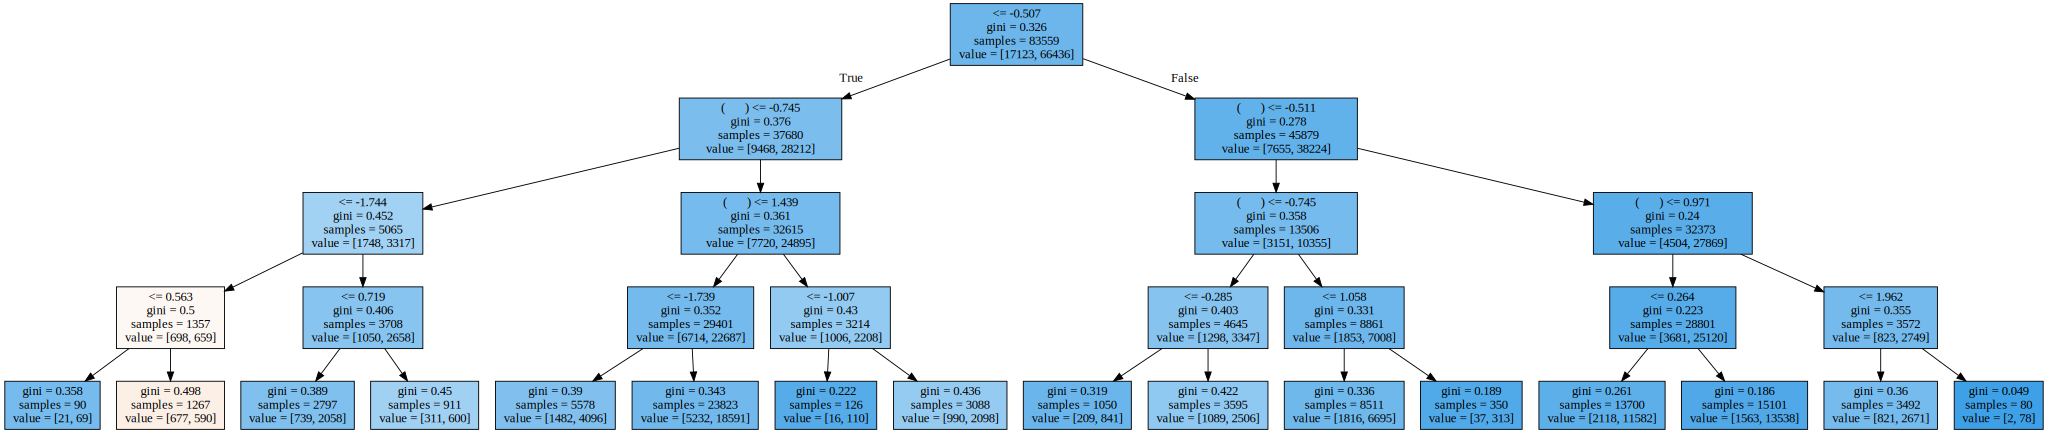

In [185]:
rf_graph=DecisionTreeClassifier(min_samples_leaf=50,min_samples_split=30,max_depth=4,random_state=1234)
rf_graph.fit(df_train_x,df_train_y)

export_graphviz(rf_graph,out_file="rf_depth.dot",
               feature_names=v_feature_name,impurity=True,filled=True)
with open("rf_depth.dot")as f:
    dot_graph=f.read()
    display(graphviz.Source(dot_graph))

# 그레디언트 부스팅

In [145]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

print("정확도 Training Set : {:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("정확도 Test Set : {:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

정확도 Training Set : 0.870
정확도 Test Set : 0.847


In [146]:
train_accuracy=[];test_accuracy=[];
para_lr= [lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate=v_learning_rate,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
gb_accuracy_lr= pd.DataFrame()
gb_accuracy_lr["learning rate"]=para_lr
gb_accuracy_lr["Train Accuracy"]=train_accuracy
gb_accuracy_lr["Test Accuracy"]=test_accuracy

In [147]:
gb_accuracy_lr.round(3)

,learning rate,Train Accuracy,Test Accuracy
0,0.1,0.870,0.847
1,0.2,0.884,0.847
2,0.3,0.895,0.847
3,0.4,0.902,0.844
4,0.5,0.908,0.841
5,0.6,0.915,0.839
6,0.7,0.917,0.842
7,0.8,0.918,0.840
8,0.9,0.923,0.838


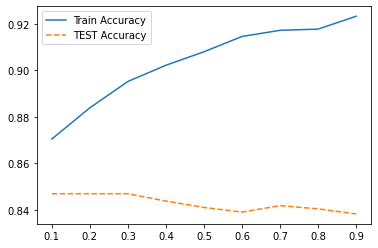

In [148]:

plt.plot(para_lr,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_lr,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [149]:
train_accuracy=[];test_accuracy=[];
para_n_tree= [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators=v_n_estimators, learning_rate=0.1 ,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
gb_accuracy_n= pd.DataFrame()
gb_accuracy_n["n_estimators"]=para_n_tree
gb_accuracy_n["Train Accuracy"]=train_accuracy
gb_accuracy_n["Test Accuracy"]=test_accuracy
gb_accuracy_n.round(3)

,n_estimators,Train Accuracy,Test Accuracy
0,10,0.817,0.814
1,20,0.848,0.840
2,30,0.858,0.846
3,40,0.864,0.847
4,50,0.863,0.847
5,60,0.865,0.846
6,70,0.865,0.847
7,80,0.868,0.848
8,90,0.869,0.848
9,100,0.870,0.847


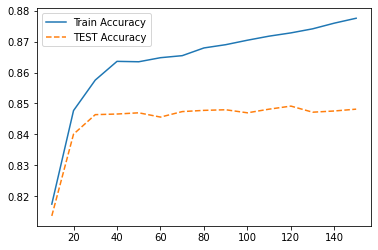

In [150]:
plt.plot(para_n_tree,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [151]:
train_accuracy=[];test_accuracy=[];
para_depth= [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,n_estimators=50,learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
gb_accuracy_depth= pd.DataFrame()
gb_accuracy_depth["Depth"]=para_depth
gb_accuracy_depth["Train Accuracy"]=train_accuracy
gb_accuracy_depth["Test Accuracy"]=test_accuracy
gb_accuracy_depth.round(3)

,Depth,Train Accuracy,Test Accuracy
0,1,0.825,0.817
1,2,0.848,0.841
2,3,0.863,0.847
3,4,0.871,0.851
4,5,0.884,0.848
5,6,0.905,0.850
6,7,0.930,0.851
7,8,0.955,0.851
8,9,0.978,0.849
9,10,0.992,0.848


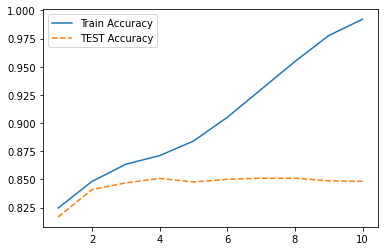

In [152]:
plt.plot(para_depth,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [153]:
train_accuracy=[];test_accuracy=[];
para_split= [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split=v_min_samples_split,max_depth = 4,n_estimators=50,learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
gb_accuracy_split= pd.DataFrame()
gb_accuracy_split["Min_samples_split"]=para_split
gb_accuracy_split["Train Accuracy"]=train_accuracy
gb_accuracy_split["Test Accuracy"]=test_accuracy
gb_accuracy_split.round(3)

,Min_samples_split,Train Accuracy,Test Accuracy
0,10,0.870,0.850
1,20,0.869,0.850
2,30,0.870,0.852
3,40,0.870,0.850
4,50,0.870,0.849
5,60,0.869,0.850
6,70,0.869,0.850
7,80,0.870,0.850
8,90,0.869,0.850
9,100,0.870,0.848


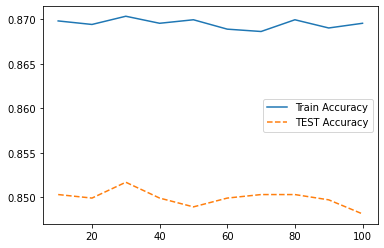

In [154]:
plt.plot(para_split,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [155]:
train_accuracy=[];test_accuracy=[];
para_leaf= [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf=v_min_samples_leaf,min_samples_split=30,max_depth = 4,n_estimators=50, learning_rate=0.1,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
gb_accuracy_leaf= pd.DataFrame()
gb_accuracy_leaf["Min_samples_leaf"]=para_leaf
gb_accuracy_leaf["Train Accuracy"]=train_accuracy
gb_accuracy_leaf["Test Accuracy"]=test_accuracy
gb_accuracy_leaf.round(3)

,Min_samples_leaf,Train Accuracy,Test Accuracy
0,10,0.871,0.848
1,20,0.869,0.850
2,30,0.868,0.849
3,40,0.869,0.851
4,50,0.866,0.848
5,60,0.867,0.850
6,70,0.866,0.850
7,80,0.866,0.849
8,90,0.867,0.849
9,100,0.864,0.850


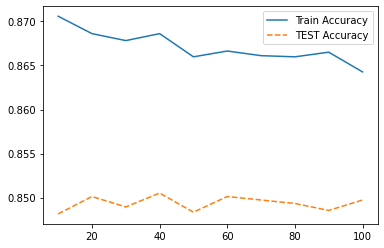

In [156]:
plt.plot(para_leaf,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle='--',label="TEST Accuracy")
plt.legend()

In [157]:
gb_final=GradientBoostingClassifier(min_samples_leaf=20,min_samples_split=30,max_depth=4,n_estimators=50,learning_rate=0.1,random_state=1234)

gb_final.fit(df_train_x,df_train_y)

y_pred=gb_final.predict(df_test_x)

print("Traning set 정확도 : {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("TEST set 정확도 : {:.3f}".format(gb_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Traning set 정확도 : 0.869
TEST set 정확도 : 0.850
Confusion matrix:
[[3697  294]
 [ 465  608]]


In [158]:
from sklearn.metrics import classification_report
report = classification_report(df_test_y, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      3991
         1.0       0.67      0.57      0.62      1073

    accuracy                           0.85      5064
   macro avg       0.78      0.75      0.76      5064
weighted avg       0.84      0.85      0.85      5064



Text(0, 0.5, '설명변수')

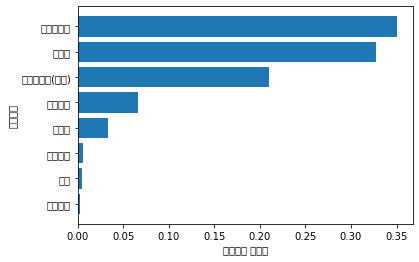

In [159]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=gb_final.feature_importances_

df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [160]:
df_importance

,Feature,Importance
1,자녀여부,0.002779
3,연령,0.004739
0,유입경로,0.005494
6,할인율,0.032812
5,결제금액,0.066351
4,구매시월령(수정),0.210391
2,중분류,0.327104
7,재구매횟수,0.350328
